Epoch 1/10
8/8 [==============================] - 30s 4s/step - loss: 2.3698 - accuracy: 0.5459 - val_loss: 1.4318 - val_accuracy: 0.7414
Epoch 2/10
8/8 [==============================] - 27s 3s/step - loss: 1.5427 - accuracy: 0.6026 - val_loss: 0.7436 - val_accuracy: 0.7586
Epoch 3/10
8/8 [==============================] - 27s 3s/step - loss: 0.8739 - accuracy: 0.6900 - val_loss: 0.4992 - val_accuracy: 0.8103
Epoch 4/10
8/8 [==============================] - 27s 3s/step - loss: 0.4714 - accuracy: 0.7948 - val_loss: 0.3642 - val_accuracy: 0.8103
Epoch 5/10
8/8 [==============================] - 27s 3s/step - loss: 0.3239 - accuracy: 0.8646 - val_loss: 0.3256 - val_accuracy: 0.7931
Epoch 6/10
8/8 [==============================] - 27s 3s/step - loss: 0.2758 - accuracy: 0.8865 - val_loss: 0.3378 - val_accuracy: 0.9138
Epoch 7/10
8/8 [==============================] - 27s 3s/step - loss: 0.2790 - accuracy: 0.9039 - val_loss: 0.3426 - val_accuracy: 0.7931
Epoch 8/10
8/8 [==================

C:\Users\Harshavelu\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Harshavelu\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Harshavelu\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Harshavelu\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be r

Pre-AdaBoost Metrics:
Accuracy: 87.9310, F1 Score: 74.0741, Sensitivity: 66.6667, Specificity: 87.9310

Post-AdaBoost Metrics:
Accuracy: 96.5517, F1 Score: 89.6552, Sensitivity: 86.6667, Specificity: 94.8276


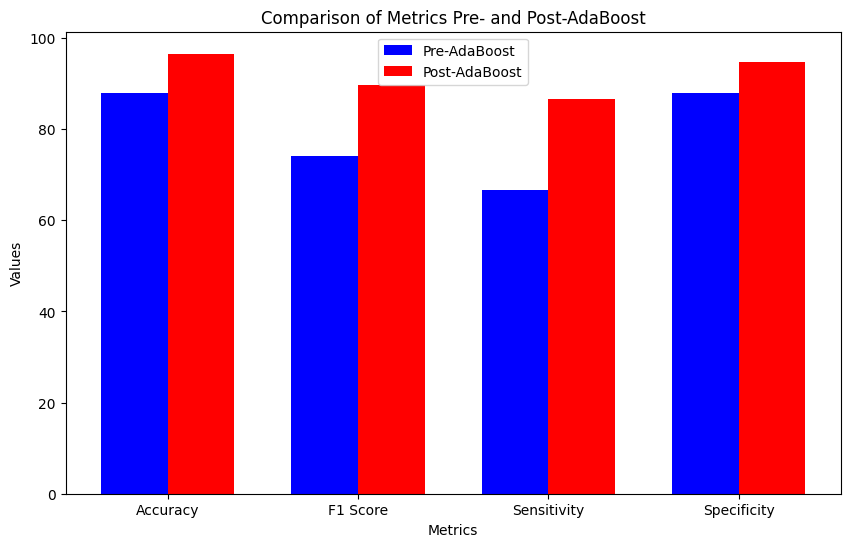

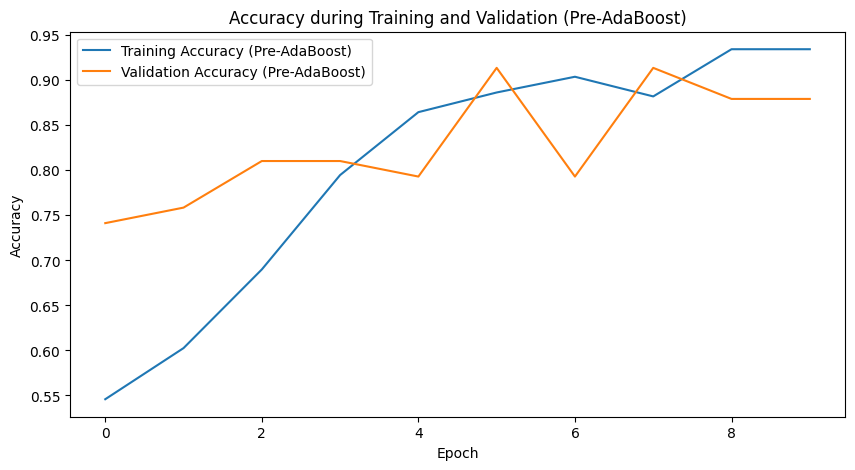

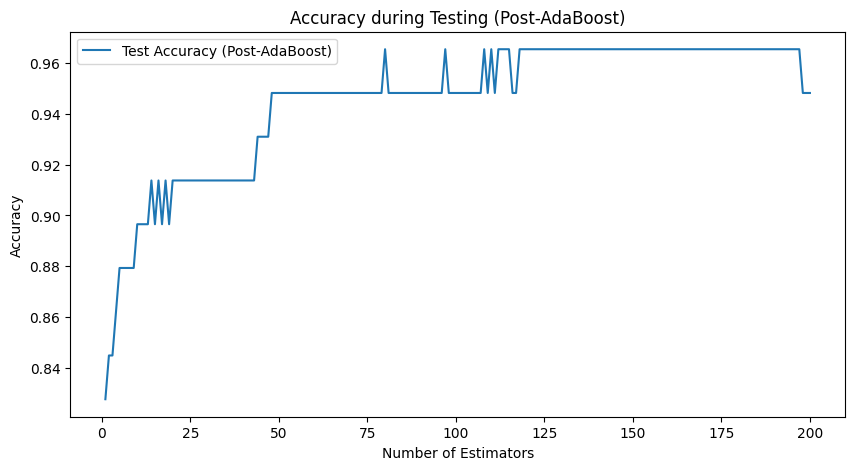

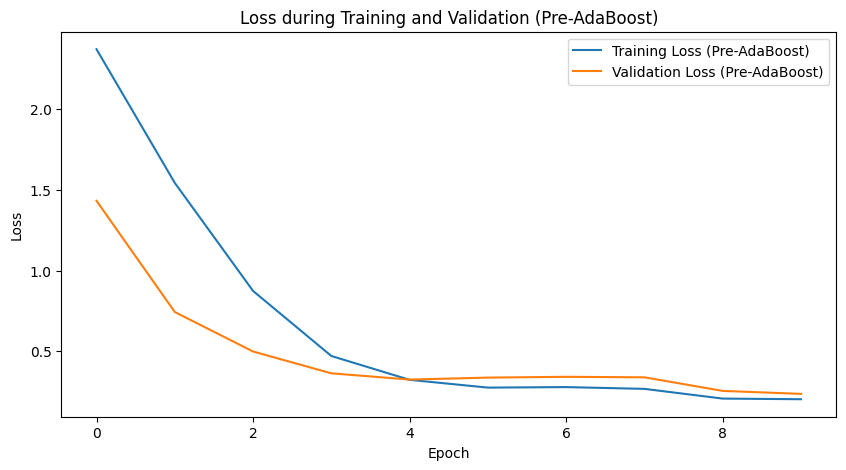

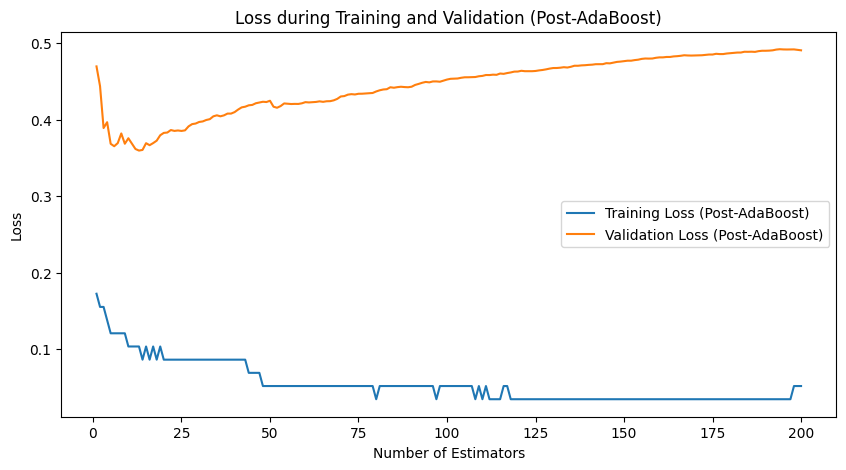

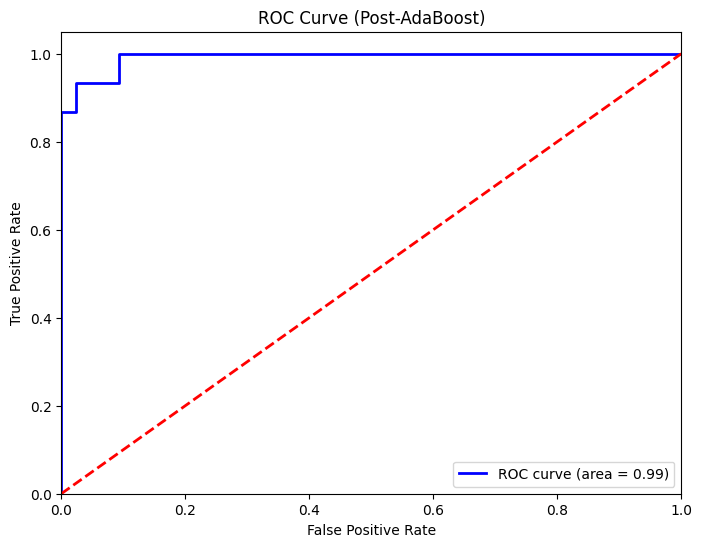

In [5]:
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, log_loss
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Function to load and preprocess data
def load_data(data_dir, img_size=(224, 224), test_size=0.2, random_state=42):
    images = []
    labels = []

    for label in ['Uninfected', 'Parasite']:  # Adjusted the order here
        label_path = os.path.join(data_dir, 'Test' if label == 'Parasite' else 'Train', label)
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            img = load_img(image_path, target_size=img_size)
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(1 if label == 'Parasite' else 0)

    images = np.array(images)
    labels = np.array(labels)

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=test_size, random_state=random_state)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return X_train, X_test, y_train, y_test

# Function to create a CNN model with transfer learning
def create_cnn_model(base_model, input_shape, num_classes):
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='sigmoid')
    ])
    return model

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=batch_size)
    
    # Evaluate performance on the test set
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    sensitivity = recall_score(y_test, y_pred) * 100
    specificity = accuracy_score(y_test, y_pred) * 100
    
    print("Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")

    return model, accuracy, f1, sensitivity, specificity, history

# Load data
data_dir = r'C:\Users\Harshavelu\Downloads\Datasets\Dataset'  # Update to the correct path
X_train, X_test, y_train, y_test = load_data(data_dir)

# Load pre-trained model (VGG16)
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create CNN model with transfer learning (VGG16)
cnn_model_vgg16 = create_cnn_model(base_model_vgg16, input_shape=(224, 224, 3), num_classes=1)

cnn_model_vgg16, accuracy_pre_adaboost, f1_pre_adaboost, sensitivity_pre_adaboost, specificity_pre_adaboost, history_pre_adaboost = train_and_evaluate(
    cnn_model_vgg16, X_train, y_train, X_test, y_test
)

# Flatten the base model's predictions for AdaBoost
X_train_flat_vgg16 = base_model_vgg16.predict(X_train).reshape(X_train.shape[0], -1)
X_test_flat_vgg16 = base_model_vgg16.predict(X_test).reshape(X_test.shape[0], -1)

# Train AdaBoost classifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train_flat_vgg16, y_train)

ada_clf_vgg16 = grid_search.best_estimator_

# Get the staged predictions
staged_predictions = [accuracy_score(y_test, pred) for pred in ada_clf_vgg16.staged_predict(X_test_flat_vgg16)]

# Calculate the loss (1 - accuracy)
loss = [1 - acc for acc in staged_predictions]

# Calculate the validation loss using log_loss
validation_loss = [log_loss(y_test, pred) for pred in ada_clf_vgg16.staged_predict_proba(X_test_flat_vgg16)]

# Compare the accuracy, f1 score, sensitivity, and specificity scores
print("Pre-AdaBoost Metrics:")
print(f"Accuracy: {accuracy_pre_adaboost:.4f}, F1 Score: {f1_pre_adaboost:.4f}, Sensitivity: {sensitivity_pre_adaboost:.4f}, Specificity: {specificity_pre_adaboost:.4f}")

# Find the epoch with the highest accuracy after AdaBoost
best_epoch_post_adaboost = np.argmax(staged_predictions)
accuracy_post_adaboost = staged_predictions[best_epoch_post_adaboost] * 100
f1_post_adaboost = f1_score(y_test, ada_clf_vgg16.predict(X_test_flat_vgg16)) * 100
sensitivity_post_adaboost = recall_score(y_test, ada_clf_vgg16.predict(X_test_flat_vgg16)) * 100
specificity_post_adaboost = accuracy_score(y_test, ada_clf_vgg16.predict(X_test_flat_vgg16)) * 100

print("\nPost-AdaBoost Metrics:")
print(f"Accuracy: {accuracy_post_adaboost:.4f}, F1 Score: {f1_post_adaboost:.4f}, Sensitivity: {sensitivity_post_adaboost:.4f}, Specificity: {specificity_post_adaboost:.4f}")

# Plot bar chart comparing pre and post-AdaBoost metrics
metrics_labels = ['Accuracy', 'F1 Score', 'Sensitivity', 'Specificity']
pre_metrics_values = [accuracy_pre_adaboost, f1_pre_adaboost, sensitivity_pre_adaboost, specificity_pre_adaboost]
post_metrics_values = [accuracy_post_adaboost, f1_post_adaboost, sensitivity_post_adaboost, specificity_post_adaboost]

bar_width = 0.35
index = np.arange(len(metrics_labels))

plt.figure(figsize=(10, 6))
plt.bar(index, pre_metrics_values, bar_width, label='Pre-AdaBoost', color='b')
plt.bar(index + bar_width, post_metrics_values, bar_width, label='Post-AdaBoost', color='r')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Metrics Pre- and Post-AdaBoost')
plt.xticks(index + bar_width / 2, metrics_labels)
plt.legend()
plt.show()

# Plot accuracy during training and validation for the initial VGG-16 model (Pre-AdaBoost)
plt.figure(figsize=(10, 5))
plt.plot(history_pre_adaboost.history['accuracy'], label='Training Accuracy (Pre-AdaBoost)')
plt.plot(history_pre_adaboost.history['val_accuracy'], label='Validation Accuracy (Pre-AdaBoost)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy during Training and Validation (Pre-AdaBoost)')
plt.show()

# Plot accuracy during training after AdaBoost
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(staged_predictions) + 1), staged_predictions, label='Test Accuracy (Post-AdaBoost)')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy during Testing (Post-AdaBoost)')
plt.legend()
plt.show()


# Plot loss during training and validation for the initial VGG-16 model (Pre-AdaBoost)
plt.figure(figsize=(10, 5))
plt.plot(history_pre_adaboost.history['loss'], label='Training Loss (Pre-AdaBoost)')
plt.plot(history_pre_adaboost.history['val_loss'], label='Validation Loss (Pre-AdaBoost)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss during Training and Validation (Pre-AdaBoost)')
plt.show()

# Plot loss during training after AdaBoost
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss (Post-AdaBoost)')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss (Post-AdaBoost)')  
plt.xlabel('Number of Estimators')
plt.ylabel('Loss')
plt.title('Loss during Training and Validation (Post-AdaBoost)')
plt.legend()
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ada_clf_vgg16.predict_proba(X_test_flat_vgg16)[:, 1])
roc_auc = roc_auc_score(y_test, ada_clf_vgg16.predict_proba(X_test_flat_vgg16)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Post-AdaBoost)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import joblib
joblib.dump(ada_clf_vgg16, 'ada_clf_vgg16.joblib')